<a href="https://colab.research.google.com/github/abdallaho98/AutoSpeech/blob/master/SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip3 install ktrain

     |████████████████████████████████| 25.3MB 61.5MB/s 
     |████████████████████████████████| 983kB 34.8MB/s 
     |████████████████████████████████| 245kB 35.9MB/s 
     |████████████████████████████████| 890kB 35.1MB/s 
     |████████████████████████████████| 471kB 38.2MB/s 
     |████████████████████████████████| 890kB 35.1MB/s 
     |████████████████████████████████| 3.0MB 37.8MB/s 
     |████████████████████████████████| 1.1MB 37.7MB/s 
  Created wheel for ktrain: filename=ktrain-0.21.2-cp36-none-any.whl size=25269840 sha256=b0294a0ea3733fa6959f38cc078832536cc496081af05e5d520657d9f0a4b08f
  Stored in directory: /root/.cache/pip/wheels/5a/16/d5/4673e3d2507440040ce1a144db9946b77d08a666e3dd25ddbc
  Created wheel for keras-bert: filename=keras_bert-0.86.0-cp36-none-any.whl size=34145 sha256=3a8a16015addee7a6fc2d9f8b6a6405c4bc857df996a97af7cdf4764514e46ce
  Stored in directory: /root/.cache/pip/wheels/66/f0/b1/748128b58562fc9e31b907bb5e2ab6a35eb37695e83911236b
  Created wheel for la

In [2]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
import os
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID";
os.environ["CUDA_VISIBLE_DEVICES"]="0";

In [3]:
import ktrain
from ktrain import text

In [ ]:
import pandas as pd
filepath = 'legalts.txt'
df = pd.DataFrame(columns=('type', 'content'))
with open(filepath) as fp:
   line = fp.readline()
   cnt = 0
   while line:
       x = line.strip().split("  ")
       df.loc[cnt] = [int(x[1]) , x[0]]
       line = fp.readline()
       cnt += 1
df['type'] = df['type'].apply(lambda x: 'right' if x == 1 else 'permit' if x == 2 else 'obligation' if x == 3 else 'prohibition' if x == 4 else 'other')
df.columns = ['label', 'text']
df = pd.concat([df, df.label.astype('str').str.get_dummies()], axis=1, sort=False)
df = df[['text', 'right', 'permit','obligation' ,'prohibition' , 'other']]
df.head()

,text,right,permit,obligation,prohibition,other
0,ليس للشركاء في مال شائع أن يطلبوا قسمته إذا تب...,0,0,0,1,0
1,إذا وقع تحريف في نص السفتجة فالأشخاص الموقعون ...,0,0,0,0,1
2,يجوز الحجز على الأجر أو المرتب بقيمة النفقة ال...,0,1,0,0,0
3,يعين القاضي طبقا لأحكام قانون الأسرة، مقدما من...,0,0,1,0,0
4,يجوز للعموم المعارضة في أي تصحيح قضائي أو إدار...,0,1,0,0,0


In [115]:
import pandas as pd
import snowballstemmer
import re
import string
ar_light_stem = snowballstemmer.stemmer('arabic') 
filepath = 'legalts.txt'
df = pd.DataFrame(columns=('type', 'content'))
with open(filepath) as fp:
   line = fp.readline()
   cnt = 0
   while line:
       x = line.strip().split("  ")
       result = re.sub(r'[0-9,.()،]+', '', x[0])
       listStrin = [ar_light_stem.stemWord(text) for text in result.split(' ')]
       strin = ' '.join(listStrin)
       df.loc[cnt] = [int(x[1]) , strin]
       line = fp.readline()
       cnt += 1
df['type'] = df['type'].apply(lambda x: 'right' if x == 1 else 'permit' if x == 2 else 'obligation' if x == 3 else 'prohibition' if x == 4 else 'other')
df.columns = ['label', 'text']
df = pd.concat([df, df.label.astype('str').str.get_dummies()], axis=1, sort=False)
df = df[['text', 'right', 'permit','obligation' ,'prohibition' , 'other']]
df.head()

,text,right,permit,obligation,prohibition,other
0,ليس شركاء في مال شايع ان يطلب قسم اذا تبين من ...,0,0,0,1,0
1,اذا وقع تحريف في نص سفتج فالاشخاص موقع علي بعد...,0,0,0,0,1
2,يجوز حجز علي اجر او مرتب قيم نفق غذاء اذا كان ...,0,1,0,0,0
3,يعين قاض طبق لاحكام قانون اسر مقدم من بين اقار...,0,0,1,0,0
4,يجوز عموم معارض في اي تصحيح قضاء او ادار لعقد ...,0,1,0,0,0


In [155]:
(x_train, y_train), (x_test, y_test), preproc = text.texts_from_df(df, 
                                                                   'text', # name of column containing review text
                                                                   label_columns=['right', 'permit','obligation' ,'prohibition' , 'other'],
                                                                   maxlen=1000, 
                                                                   max_features=10000,
                                                                   preprocess_mode='standard',
                                                                   val_pct=0.2,
                                                                   ngram_range=5)


language: ar
Word Counts: 3181
Nrows: 828
828 train sequences
train sequence lengths:
	mean : 26
	95percentile : 48
	99percentile : 59
Adding 5-gram features
max_features changed to 77593 with addition of ngrams
Average train sequence length with ngrams: 121
train (w/ngrams) sequence lengths:
	mean : 122
	95percentile : 228
	99percentile : 287
x_train shape: (828,1000)
y_train shape: (828, 5)
Is Multi-Label? False
207 test sequences
test sequence lengths:
	mean : 26
	95percentile : 44
	99percentile : 59
Average test sequence length with ngrams: 48
test (w/ngrams) sequence lengths:
	mean : 48
	95percentile : 99
	99percentile : 174
x_test shape: (207,1000)
y_test shape: (207, 5)


In [156]:
model = text.text_classifier('nbsvm', (x_train, y_train) , preproc=preproc)
learner = ktrain.get_learner(model, 
                             train_data=(x_train, y_train), 
                             val_data=(x_test, y_test), 
                             batch_size=8)

Is Multi-Label? False
compiling word ID features...
maxlen is 1000
building document-term matrix... this may take a few moments...
rows: 1-828
computing log-count ratios...
done.


simulating training for different learning rates... this may take a few moments...
Epoch 1/1024
104/104 [==============================] - 0s 2ms/step - loss: 1.6095 - accuracy: 0.3370
Epoch 2/1024
104/104 [==============================] - 0s 2ms/step - loss: 1.6092 - accuracy: 0.3382
Epoch 3/1024
104/104 [==============================] - 0s 3ms/step - loss: 1.6081 - accuracy: 0.3430
Epoch 4/1024
104/104 [==============================] - 0s 3ms/step - loss: 1.6052 - accuracy: 0.3527
Epoch 5/1024
104/104 [==============================] - 0s 3ms/step - loss: 1.5970 - accuracy: 0.4034
Epoch 6/1024
104/104 [==============================] - 0s 3ms/step - loss: 1.5742 - accuracy: 0.5411
Epoch 7/1024
104/104 [==============================] - 0s 2ms/step - loss: 1.5118 - accuracy: 0.8104
Epoch 8/1024
104/104 [==============================] - 0s 3ms/step - loss: 1.3533 - accuracy: 0.9505
Epoch 9/1024
104/104 [==============================] - 0s 3ms/step - loss: 1.0274 - accuracy: 0.9758

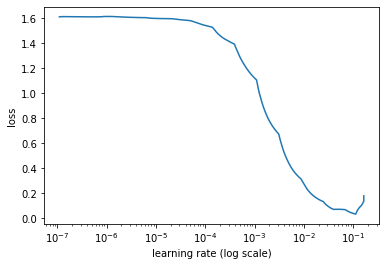

In [157]:
learner.lr_find(show_plot=True)

In [158]:
learner.autofit(1e-2, 1)



begin training using triangular learning rate policy with max lr of 0.01...
104/104 [==============================] - 0s 4ms/step - loss: 0.9417 - accuracy: 0.8019 - val_loss: 0.8033 - val_accuracy: 0.7729


In [ ]:
learner.view_top_losses(n=3, preproc=preproc)

----------
id:1 | loss:1.47 | true:prohibition | pred:obligation)

يمنع علي محجوز لدي وفاء من مبالغ محجوز للمد محجوز علي من تاريخ توقيع حجز


In [ ]:
p = ktrain.get_predictor(learner.model, preproc)

In [ ]:
p.predict("لا يجوز أن يكون تأويل العبارات الغامضة في عقود الاذعان ضارا بمصلحة الطرف المذعن")

'prohibition'

In [ ]:
p.predict("يمنع إبطال العقد إذا لم يتمسك به صاحبه خلال خمس )5( سنوات.")

'prohibition'

In [ ]:
p.predict("يجوز أن يؤمر بالنفاذ المعجل بالنسبة لهذا الإجرا")

'permit'

In [ ]:
p.predict("يجوز تخفيض العقوبة المنصوص عليها قانونا بالنسبة للشخص الطبيعي الذي قضي بإدانته وتقررت إفادته بظروف مخففة")

'permit'

In [ ]:
p.save('/content/predictor')

In [ ]:
predictor = ktrain.load_predictor('/content/predictor')

In [ ]:
predictor.predict("يمنع إبطال العقد إذا لم يتمسك به صاحبه خلال خمس )5( سنوات.")

'prohibition'

In [ ]:
!zip -r /content/file.zip /content/predictor

  adding: content/predictor/ (stored 0%)
  adding: content/predictor/tf_model.h5 (deflated 81%)
  adding: content/predictor/tf_model.preproc (deflated 44%)
